<h1 style="text-align:center">Implementasi Logika Fuzzy pada Alat Pengering Lada Otomatis</h1>
<hr>
<br>
<h3 style="text-align:center">Disusun oleh: </h3>
<h2 style="text-align:center">Septiani Kusuma Ningrum</h2>
<h2 style="text-align:center">09011182025018</h2>
<br>
<h1 style="text-align:center">Dosen Pengampuh: </h1>
<h1 style="text-align:center">Prof. Dr. Ir. Siti Nurmaini, M.T</h1>
<br>
<br>
<h1 style="text-align:center">Jurusan Sistem Komputer</h1>
<h1 style="text-align:center">Fakultas Ilmu Komputer</h1>
<h1 style="text-align:center">Universitas Sriwijaya</h1>
<h1 style="text-align:center">2022</h1>

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_volum = ctrl.Antecedent(np.arange(0,30,1),'x_volum')
x_kelembapan = ctrl.Antecedent(np.arange(0,90,1),'x_kelembapan')
x_suhu = ctrl.Consequent(np.arange(0,70,1),'x_suhu')

In [ ]:
x_kelembapan['kering'] = fuzz.trapmf(x_kelembapan.universe,(0,0,1,20))
x_kelembapan['sedang'] = fuzz.trimf(x_kelembapan.universe,(15,37.5,60))
x_kelembapan['basah'] = fuzz.trapmf(x_kelembapan.universe,(45,75,90,90))
x_kelembapan.view()

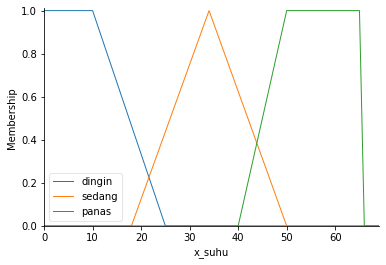

In [6]:
x_suhu['dingin'] = fuzz.trapmf(x_suhu.universe,(0,0,10,25))
x_suhu['sedang'] = fuzz.trimf(x_suhu.universe,(18,34,50))
x_suhu['panas'] = fuzz.trapmf(x_suhu.universe,(40,50,65,65))
x_suhu.view()

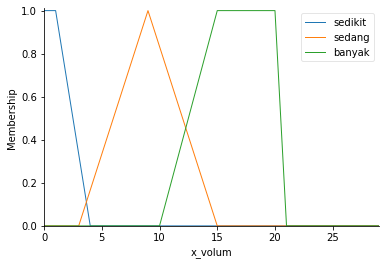

In [7]:
x_volum['sedikit'] = fuzz.trapmf(x_volum.universe,(0,0,1,4))
x_volum['sedang'] = fuzz.trimf(x_volum.universe,(3,9,15))
x_volum['banyak'] = fuzz.trapmf(x_volum.universe,(10,15,20,20))
x_volum.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

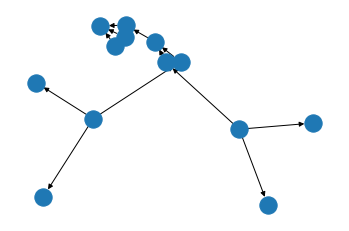

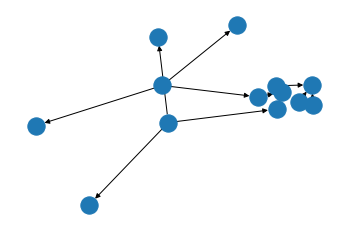

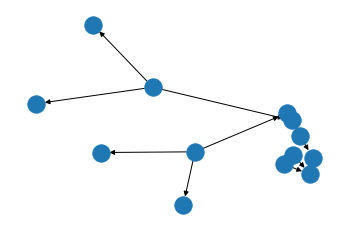

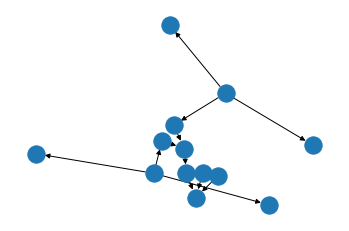

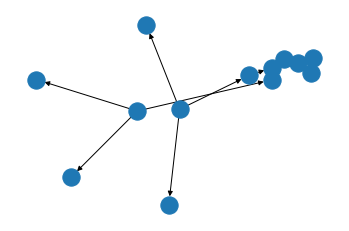

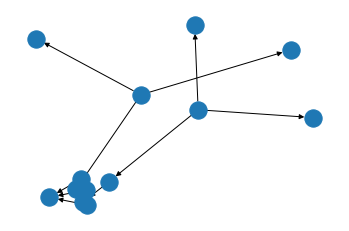

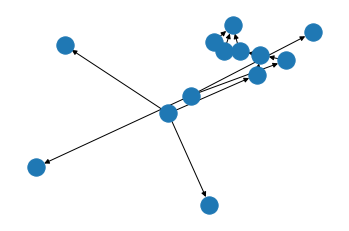

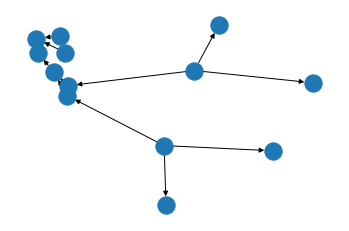

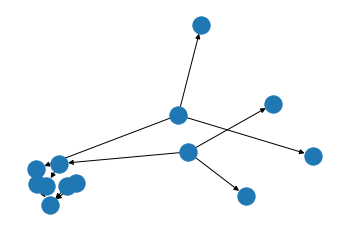

In [8]:
rule1 = ctrl.Rule(x_volum['sedikit'] & x_kelembapan['kering'], x_suhu['dingin'])
rule2 = ctrl.Rule(x_volum['sedikit'] & x_kelembapan['sedang'], x_suhu['sedang'])
rule3 = ctrl.Rule(x_volum['sedikit'] & x_kelembapan['basah'], x_suhu['panas'])

rule4 = ctrl.Rule(x_volum['sedang'] & x_kelembapan['kering'], x_suhu['dingin'])
rule5 = ctrl.Rule(x_volum['sedang'] & x_kelembapan['sedang'], x_suhu['sedang'])
rule6 = ctrl.Rule(x_volum['sedang'] & x_kelembapan['basah'], x_suhu['panas'])

rule7 = ctrl.Rule(x_volum['banyak'] & x_kelembapan['kering'], x_suhu['dingin'])
rule8 = ctrl.Rule(x_volum['banyak'] & x_kelembapan['sedang'], x_suhu['sedang'])
rule9 = ctrl.Rule(x_volum['banyak'] & x_kelembapan['basah'], x_suhu['panas'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

In [ ]:
suhu_rule1 = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
suhu = ctrl.ControlSystemSimulation(suhu_rule1)

<h2>Contoh Kasus</h2>
<p>
   Produsen lada pada suatu daerah memberlakukan otomatisasi pada alat pengering lada nya yaitu dengan memasang sensor volum yang digunakan untuk mendeteksi banyaknya lada yang dimasukkan kedalam alat tersebut dan sensor kelembaban untuk mendeteksi kelembaban dari lada tersebut. Pada kasus ini, diketahui volum lada sebanyak 3 liter serta kelembapan lada 55.<br>
    Bagaimana respon yang akan diberikan oleh alat pengering tersebut?
</p>

In [ ]:
volum = input('temperatur volum: ') 
kelembapan = input('kelembapan kelembapan: ') 

In [ ]:
suhu.input['x_volum'] = float(volum)
suhu.input['x_kelembapan'] = float(kelembapan)

suhu.compute()

In [ ]:
print(suhu.output['x_suhu'])
x_suhu.view(sim=suhu)